### Least Squares Fitting

In this notebook, we will work through the same example we used in the lecture - least squares fit to a straight line. We have a set of data values $x_i,y_i$, and want to find the best fit straight line of the form 

$$ y = a + bx$$

We will use the same referendum voting dataset that we used for demonstrating the calculation of the correlation coefficient.  First, the usual set up.

In [31]:
import numpy as np
from math import *
from scipy import stats 
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, output_notebook, show
output_notebook() 
from bokeh.models import Label

Loading BokehJS ...

First, read in the data from the file [voting-data.txt](voting-data.txt). We will just put the columns into arrays called $x$ and $y$ . Saves a bit of typing...

In [32]:
vdata='voting-data.txt'
y=np.loadtxt(vdata,usecols=(1)) # vote data in 2nd column
x=np.loadtxt(vdata,usecols=(2)) # income data in 3rd column
N=len(y)                 # number of data points
muy=np.mean(y)           # mean of y-values
mux=np.mean(x)           # mean of x-values

Next, in order to use the handy shortcut formulae we looked in the notes and lectures, we subtract the means to get the deviation arrays. **Note**: in numpy, if x and y are arrays, i.e. [x0, x1, x2...] and [y0, y1, y2...]  then x*y means the element by element multiplication i.e. [x0y0, x1y1, x2y2...]  - not the matrix multiplication, or the dot product.

In [3]:
# deviation arrays
dx=x-mux
dy=y-muy
dxdy=dx*dy  # element-by-element multiplication
d2x=dx*dx
d2y=dy*dy

Following the notes, this is enough to give us our best fit values of slope $b$ and intercept $a$.

Of course, numpy can do this automatically for you using polyfit

In [41]:
b=sum(dxdy)/sum(d2x)
a=muy-b*mux
print('==============================================================')
print('least squares solution: intercept a=',round(a,2),'slope b=',round(b,2))
print('==============================================================')

# Linear fit
mux, muy = np.mean(x), np.mean(y)
b, a = np.polyfit(x, y, 1)
x_fit = np.array([xmin, xmax])
y_fit = b * x_fit + a
mux, muy = np.mean(x), np.mean(y)
print('==============================================================')
print('numpy polyfit solution: intercept a=',round(a,2),'slope b=',round(b,2))
print('==============================================================')


# Calculate correlation coefficient (r-value)
r_value = np.corrcoef(x, y)[0, 1]
print(f"Correlation Coefficient (r-value): {r_value:.4f}")



least squares solution: intercept a= 11.6 slope b= 2.95
numpy polyfit solution: intercept a= 11.6 slope b= 2.95
Correlation Coefficient (r-value): 0.6088


We can plot this and check that it goes through the mean values as expected:

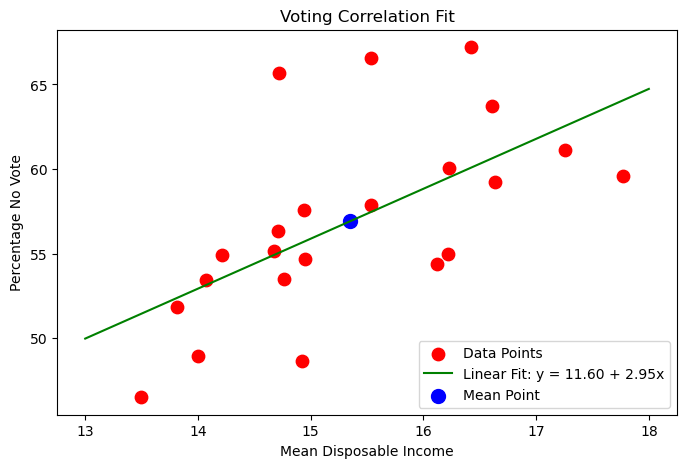

In [39]:
xmin=13; xmax=18
ymin=40;ymax=70


fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Voting Correlation Fit")
ax.set_xlabel("Mean Disposable Income")
ax.set_ylabel("Percentage No Vote")

# Plot the scatter plot using Matplotlib
ax.scatter(x, y, color="red", s=80, label="Data Points")

# Plot the linear fit
ax.plot(x_fit, y_fit, color='green', label=f'Linear Fit: y = {a:.2f} + {b:.2f}x')

# Mark the mean point
ax.scatter(mux, muy, color='blue', s=100, label='Mean Point')

# Show legend
ax.legend()
plt.show()

#### Errors on parameters

We have been assuming that $x$ is the **independent variable** and $y$ is the **dependent** variable. Then  the simple least squares method gives us the best fit values of a and b, i.e. the values that minimise the sum of the squares of the vertical distances from the line. If we want **errors** on those parameters, we also need to know the errors on our $y$ values, and then use the second method given in the notes, using those various sums $S_1, S_2$ etc. 

However, the dataset doesn't supply error values, so we need to assume an error, which we will take to be the same for all $y$. This is pretty much a guess, but we can base it on a visual estimate of the observed scatter, and can play with the value to see what difference it makes.

In [26]:
S1=sum(y)/sig2   
S2=N/sig2
S3=sum(x)/sig2
xy=x*y
S4=sum(xy)/sig2
x2=x*x
S5=sum(x2)/sig2

Now we can get a and b again using the standard sums method and check we get the same answers:

In [27]:
delta=S2*S5 - S3*S3
acheck=(S1*S5 - S4*S3)/delta
bcheck=(S2*S4-S1*S3)/delta
print('simple method: a=',round(a,3),'sums method: a=',round(acheck,3))
print('simple method: b=',round(b,3),'sums method: b=',round(bcheck,3))

simple method: a= 2.952 sums method: a= 11.599
simple method: b= 11.599 sums method: b= 2.952


Now however, we can get the errors on a and b:

In [52]:
siga=sqrt(S5/delta)
sigb=sqrt(S2/delta)

print('\u03C3_a=', round(siga,3))
print('\u03C3_b=', round(sigb,3))

σ_a= 2.872
σ b= 0.187


#### Testing the fit

To test the goodness of fit, we likewise need the value of $\sigma$, so we can get $\chi^2$ rather than just $S^2$.


In [29]:
yfit=a+b*x
ydel=y-yfit
chisq=np.sum(ydel*ydel)/sig2
nu=N-2 # degrees of freedom
P=1.-stats.chi2.cdf(chisq,nu)  # prob of exceeding chisq

print('chisq=',round(chisq,2),'nu=',nu, 'with assumed sigma=',sig)
print('gives P>chisq=',round(P,5))


chisq= 341091.0 nu= 20 with assumed sigma= 1.0
gives P>chisq= 0.0


With sigma=5 this is a good fit. What if you changed sigma to say 3, or 4?

In [45]:
# Calculate R-squared value
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean) ** 2)
ss_residual = np.sum((y - (a + b * np.array(x))) ** 2)
r_squared = 1 - (ss_residual / ss_total)
print(r_squared)

0.37068131573088536
